# Population growth 

In [1]:
from IPython.display import HTML      # For animation.
from matplotlib import animation      # For animation.
from matplotlib import pyplot as plt  # For plotting.
import numpy as np                    # For solving ODE.
from scipy.integrate import odeint    # For solving ODE.

## Model

In [2]:
# Parameters.
r = 0.4    # Growth coefficient.
t0 = 0.0   # Initial time.
t1 = 10.0  # Final time.
y0 = 2     # Initial population.

# Model.
#
#     F is a function of two arguments.
#   ------------
F = lambda y, t: r * y
#                -----
#                Expression that F represents.


## Solution 

In [3]:
# Solve ODE for t = 0.00, 0.01, ..., 10.00.
t = np.linspace(t0, t1, 1000)
y = odeint(F, y0, t)

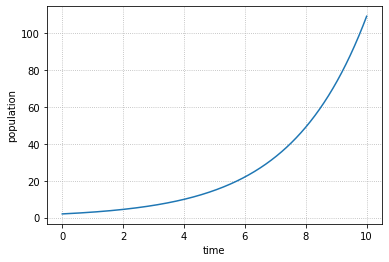

In [4]:
# Plot population vs. time.
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.show()

## Animation 

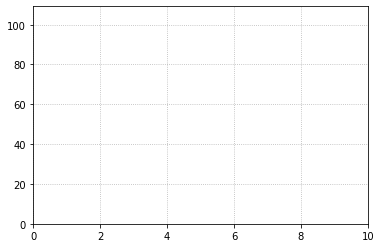

In [5]:
# Same plot, but as an animation.
# Taken from:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
FRAMES = 100

fig, ax = plt.subplots()
ax.grid(linestyle=':')
ax.set_xlim((t0, t1))    # Range of x-axis.
ax.set_ylim((0, y[-1]))  # Range of y-axis.

line = ax.plot([], [], lw=2)[0]

def init():
    # Initially, line is empty (nothing is drawn).
    line.set_data([], [])
    
    # Return a list of all lines. Here only one.
    return [line]

def animate(i):
    """Data shown on the frame #i."""
    # Take only first (i/FRAMES) of total number of points.
    k = len(t) * i // FRAMES
    line.set_data(t[:k], y[:k])
    
    # Return a list of all lines. Here only one.
    return [line]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=50, blit=True)

# A blank plot will be shown, ignore it.

In [6]:
# Create a video.
HTML(anim.to_html5_video())

## Negative coefficient (population decrease) 

In [7]:
# Using _ suffix to differentiate between old and new variables.
r_ = -0.4
y0_ = y[-1]               # Initial population value is equal to the final value earlier.
F_ = lambda y, t: r_ * y  # New F_ uses r_ instead of r.
y_ = odeint(F_, y0_, t)

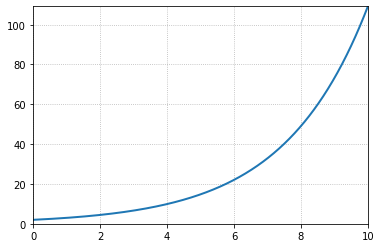

In [8]:
fig, ax = plt.subplots()
ax.grid(linestyle=':')
ax.set_xlim((t0, t1))    # Range of x-axis.
ax.set_ylim((0, y[-1]))  # Range of y-axis.

line = ax.plot([], [], lw=2)[0]
line_ = ax.plot([], [], lw=2)[0]

def init():
    line.set_data(t, y)
    line_.set_data([], [])
    return [line, line_]

def animate(i):
    # Take only first (i/FRAMES) of total number of points.
    k = len(t) * i // FRAMES
    line_.set_data(t[:k], y_[:k])
    return [line, line_]

anim_ = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=FRAMES, interval=50, blit=True)

In [9]:
# Create a video.
HTML(anim_.to_html5_video())